Running benchmarks...


/opt/anaconda3/lib/python3.11/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)
/opt/anaconda3/lib/python3.11/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)
/opt/anaconda3/lib/python3.11/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)


Done.



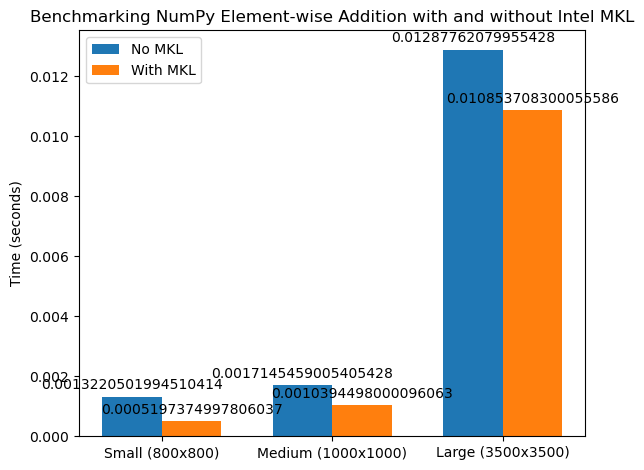


Detailed Results:
Small (800x800): No MKL = 0.001322 s, With MKL = 0.000520 s, Improvement = 60.69%
Medium (1000x1000): No MKL = 0.001715 s, With MKL = 0.001039 s, Improvement = 39.37%
Large (3500x3500): No MKL = 0.012878 s, With MKL = 0.010854 s, Improvement = 15.72%


In [7]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def benchmark_operation(operation, setup, num_runs=10):
    times = timeit.repeat(operation, setup=setup, repeat=num_runs, number=1)
    return np.mean(times)

def setup_code(size):
    return f"""
import numpy as np
np.random.seed(42)
a = np.random.rand({size}, {size})
b = np.random.rand({size}, {size})
"""

def run_benchmarks(sizes):
    results_no_mkl = {}
    results_with_mkl = {}

    for label, size in sizes.items():
        setup = setup_code(size)
        
 
        operation = "a + b"
        mean_time_no_mkl = benchmark_operation(operation, setup)
        results_no_mkl[label] = mean_time_no_mkl
       
        importlib.reload(np)
        
       
        operation = "a + b"
        mean_time_with_mkl = benchmark_operation(operation, setup)
        results_with_mkl[label] = mean_time_with_mkl
        
    return results_no_mkl, results_with_mkl

sizes = {
    "Small (800x800)": 800,
    "Medium (1000x1000)": 1000,
    "Large (3500x3500)": 3500
}

print("Running benchmarks...")
results_no_mkl, results_with_mkl = run_benchmarks(sizes)
print("Done.\n")

def plot_results(results_no_mkl, results_with_mkl, sizes):
    labels = list(sizes.keys())
    no_mkl_means = [results_no_mkl[label] for label in labels]
    with_mkl_means = [results_with_mkl[label] for label in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, no_mkl_means, width, label='No MKL')
    rects2 = ax.bar(x + width/2, with_mkl_means, width, label='With MKL')

    ax.set_ylabel('Time (seconds)')
    ax.set_title('Benchmarking NumPy Element-wise Addition with and without Intel MKL')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

plot_results(results_no_mkl, results_with_mkl, sizes)

print("\nDetailed Results:")
for label in sizes.keys():
    no_mkl_time = results_no_mkl[label]
    with_mkl_time = results_with_mkl[label]
    improvement = ((no_mkl_time - with_mkl_time) / no_mkl_time) * 100
    print(f"{label}: No MKL = {no_mkl_time:.6f} s, With MKL = {with_mkl_time:.6f} s, Improvement = {improvement:.2f}%")
